## Pandas for the NBA Lover
## Selecting Data: Box Score Stats Versus Winning Games

Now that we are familiar with the basic components of a DataFrame, let's take a look at how we can select or query the data inside a Dataframe. While doing so, we will take a closer look at two advanced player rating metrics, Player Efficiency Rating (PER) and Real Plus-Minus (RPM). At the end, we will use our knowledge about selecting data to gain a better understanding of what each metric is measuring, as well as their respective strengths and shortcomings.

Let's get started!

---

##### TODO: introduce RPM and PER here? this introduction should be about the stats (i.e. how PER is box-score based, and RPM is based on on-court performance)

Our data is located in a file named `advanced_metrics.csv`. Let's tell pandas to load this file into a DataFrame, using the first column as the Index. 

In [1]:
import pandas as pd

# formatting options: 
pd.set_option('display.max_rows', 10)

In [17]:
df = pd.read_csv('../data/advanced_metrics.csv', index_col=0)
df

,MPG,TEAM,TS%,AST,TO,USG,ORR,DRR,REBR,PER,ORPM,DRPM,RPM
PLAYER,,,,,,,,,,,,,
James Harden,37.1,HOU,0.622,20.8,13.5,40.0,2.1,17.0,9.3,29.21,7.76,-0.06,7.70
Anthony Davis,36.9,NO,0.598,14.3,6.7,29.3,10.0,27.7,19.1,31.09,3.93,3.24,7.17
Paul George,35.7,OKC,0.574,13.0,9.0,29.6,4.3,19.3,11.7,23.29,3.82,2.85,6.67
Nikola Jokic,31.3,DEN,0.587,27.6,12.0,29.1,9.7,25.6,17.6,26.09,4.46,1.83,6.29
Kyrie Irving,32.1,BOS,0.592,22.9,8.9,29.9,3.8,12.2,8.0,24.55,4.60,0.92,5.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Allonzo Trier,22.1,NY,0.543,14.2,13.7,20.8,2.2,11.5,6.6,11.50,-2.34,-2.96,-5.30
Frank Ntilikina,21.1,NY,0.439,23.4,12.5,17.1,1.1,8.7,4.7,6.14,-3.29,-2.30,-5.59
Kevin Knox,26.6,NY,0.482,6.2,8.5,21.2,3.1,13.5,8.1,9.58,-2.24,-3.78,-6.02


The labels of our index are player names:

In [3]:
df.index

Index(['James Harden', 'Anthony Davis', 'Paul George', 'Nikola Jokic',
       'Kyrie Irving', 'Stephen Curry', 'Nikola Vucevic', 'Kyle Lowry',
       'LeBron James', 'Giannis Antetokounmpo',
       ...
       'Mo Bamba', 'Avery Bradley', 'Jonathon Simmons', 'Antonio Blakeney',
       'Cedi Osman', 'Allonzo Trier', 'Frank Ntilikina', 'Kevin Knox',
       'Jamal Crawford', 'Collin Sexton'],
      dtype='object', name='PLAYER', length=343)

The data is combined from two ESPN pages, one for [PER](http://insider.espn.com/nba/hollinger/statistics/_/page/1), and another for [RPM](http://www.espn.com/nba/statistics/rpm/_/page/1). Detailed descriptions for each statistic can be found at the bottom of each link.

### 3.1 Selecting Data

#### 3.1.1 Selecting Columns

We will begin by looking at selecting data within the columns of a DataFrame. The names of all our columns are stored in the `.columns` attribute of our DataFrame:

In [18]:
df.columns

Index(['MPG', 'TEAM', 'TS%', 'AST', 'TO', 'USG', 'ORR', 'DRR', 'REBR', 'PER',
       'ORPM', 'DRPM', 'RPM'],
      dtype='object')

You'll notice these column names are also stored in an `Index` object. In pandas parlance, this means that each column name is also a label.

One way to think about a DataFrame is as a dictionary for columns of data - we can use a column label to get the associated data just like we would use a key in a dictionary to get its associated value. Here we select each player's average minutes per game.

In [5]:
df['MPG']

PLAYER
James Harden       37.1
Anthony Davis      36.9
Paul George        35.7
Nikola Jokic       31.3
Kyrie Irving       32.1
                   ... 
Allonzo Trier      22.1
Frank Ntilikina    21.1
Kevin Knox         26.6
Jamal Crawford     17.2
Collin Sexton      29.6
Name: MPG, Length: 343, dtype: float64

When the column label is also a valid Python variable name, column data can also be accessed as an attribute on the DataFrame. (If you are a working in an environment such as IPython or a Jupyter Notebook, columns that are accessible as attributes have the added benefit of being elgible for tab completion).

In [6]:
df.MPG

PLAYER
James Harden       37.1
Anthony Davis      36.9
Paul George        35.7
Nikola Jokic       31.3
Kyrie Irving       32.1
                   ... 
Allonzo Trier      22.1
Frank Ntilikina    21.1
Kevin Knox         26.6
Jamal Crawford     17.2
Collin Sexton      29.6
Name: MPG, Length: 343, dtype: float64

To select multiple columns at once, use a list of column labels as the "key":

In [7]:
df[['MPG', 'TEAM']]

,MPG,TEAM
PLAYER,,
James Harden,37.1,HOU
Anthony Davis,36.9,NO
Paul George,35.7,OKC
Nikola Jokic,31.3,DEN
Kyrie Irving,32.1,BOS
...,...,...
Allonzo Trier,22.1,NY
Frank Ntilikina,21.1,NY
Kevin Knox,26.6,NY


Note: The outputs are styled differently because selecting a single column returns a Series, while selecting multiple columns returns another DataFrame. While this distinction is mostly unimportant when it comes to selecting data in a column, it always helps to know what type of object you are working with.

What can we do with a selected column? We can start by leveraging some pandas functionality to get a feel for how RPM varies across players in the league. The `describe()` method summarizes the distribution:

In [42]:
rpm = df['RPM']
rpm.describe()

count    343.000000
mean      -0.370466
std        2.322694
min       -7.170000
25%       -1.940000
50%       -0.570000
75%        1.020000
max        7.700000
Name: RPM, dtype: float64

We can also plot the values:

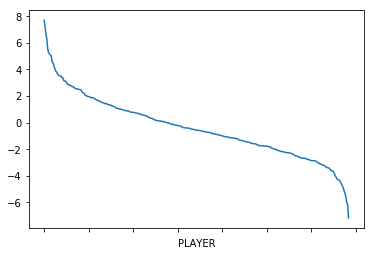

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt

rpm.plot(kind='line')

It's interesting to see how RPM varies at the extremes: the best performers are much more valuable than the average player, while the worst performers seem to do as much as harm as the best players add value.

### 3.1.2 The Label Selector

Because this type of exploratory data analysis is so common, pandas makes it very easy to select the data in a column using each column label. But we can also select data using a row label - that is, the values that populate the Index - using the `.loc` method.

We can use `.loc` to select all statistics related to James Harden:

In [77]:
df.loc['James Harden']

MPG      37.1
TEAM      HOU
TS%     0.622
AST      20.8
TO       13.5
        ...  
REBR      9.3
PER     29.21
ORPM     7.76
DRPM    -0.06
RPM       7.7
Name: James Harden, Length: 13, dtype: object

1) start with labeled dictionary, selecting columns, and groups of columns

2) next, move to loc (labeled based selecting). don't forget that these labels can # include both row and column labels (df.loc['MIA', 'Pts Scored']). mention here that the index does not need to be unique. if we were analyzing the data where each row was a player name, then it makes sense to set the index to column name. touch on slicing data frame. (df.loc['MIA:'GSW], and df.loc[:, 'G':'Opp']

3) touch on method chaining here? many operations return dataframes as a result, which allows you to method chain.

4) next, move to .iloc. show that df.iloc[2, 5] works as well, and df.iloc[:, :5]. (which is a good way to see output in a notebook without columns truncate, the sideways version of head(), if you will) end with df.iloc[:5] which is equivalent to df.head(). df.iloc[:5] == df.head(), which leads us to boolean indexing

5) boolean indexing is very commonly used. introduction to vectorized operation (operate on every element of the array. 


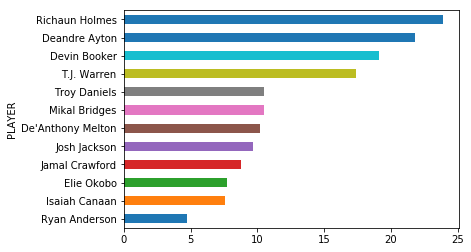

In [74]:
df[df.TEAM == 'PHX'].PER.sort_values(ascending=True).plot(kind='barh', figsize=(6, 4))

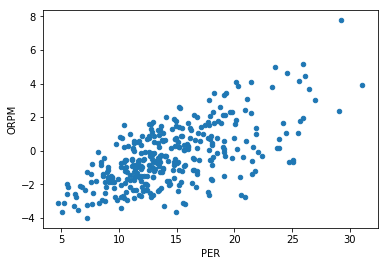

In [78]:
df.plot(kind='scatter', x='PER', y='ORPM')

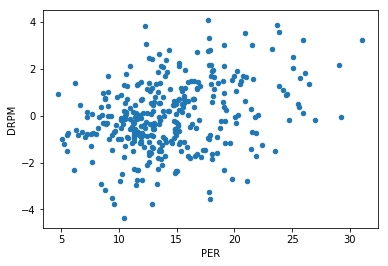

In [79]:
df.plot(kind='scatter', x='PER', y='DRPM')